In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv(r"/content/AAPL.csv")
df["opench"] = df['Open'].diff()
df.info()
df.shape
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10409 entries, 0 to 10408
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10409 non-null  object 
 1   Open       10409 non-null  float64
 2   High       10409 non-null  float64
 3   Low        10409 non-null  float64
 4   Close      10409 non-null  float64
 5   Adj Close  10409 non-null  float64
 6   Volume     10409 non-null  int64  
 7   opench     10408 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 650.7+ KB


,Date,Open,High,Low,Close,Adj Close,Volume,opench
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100323,469033600,NaN
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095089,175884800,-0.006138
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088110,105728000,-0.008929
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090291,86441600,0.002232
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092908,73449600,0.003349


In [3]:
new_df = df.iloc[:, 1:2].values
sca = MinMaxScaler()
new_df = sca.fit_transform(new_df)
new_df

array([[4.30950014e-04],
       [3.97331936e-04],
       [3.48427437e-04],
       ...,
       [9.06233004e-01],
       [9.19816120e-01],
       [9.36630598e-01]])

In [13]:
Xtr = []
ytr = []

for i in range(60,10409):
    Xtr.append(new_df[i-60:i,0])
    ytr.append(new_df[i,0])

Xtr,ytr=np.array(Xtr),np.array(ytr)

print(Xtr.shape)
print(ytr.shape)

(10349, 60)
(10349,)


In [5]:
Xtr = np.reshape(Xtr,(Xtr.shape[0],Xtr.shape[1],1))
Xtr.shape

(10349, 60, 1)

In [6]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [22]:
model = Sequential()

model.add(LSTM(units=1000, return_sequences=True, input_shape=(Xtr.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=500, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sebquences=False))
model.add(Dropout(0.2))

model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [23]:
hist = model.fit(Xtr, ytr, epochs=7, batch_size=64, verbose=2)

Epoch 1/7
162/162 - 17s - loss: 0.0017 - 17s/epoch - 103ms/step
Epoch 2/7
162/162 - 11s - loss: 3.5914e-04 - 11s/epoch - 69ms/step
Epoch 3/7
162/162 - 11s - loss: 5.3508e-04 - 11s/epoch - 68ms/step
Epoch 4/7
162/162 - 11s - loss: 3.4816e-04 - 11s/epoch - 67ms/step
Epoch 5/7
162/162 - 11s - loss: 3.5017e-04 - 11s/epoch - 67ms/step
Epoch 6/7
162/162 - 11s - loss: 3.6603e-04 - 11s/epoch - 67ms/step
Epoch 7/7
162/162 - 11s - loss: 2.8478e-04 - 11s/epoch - 67ms/step


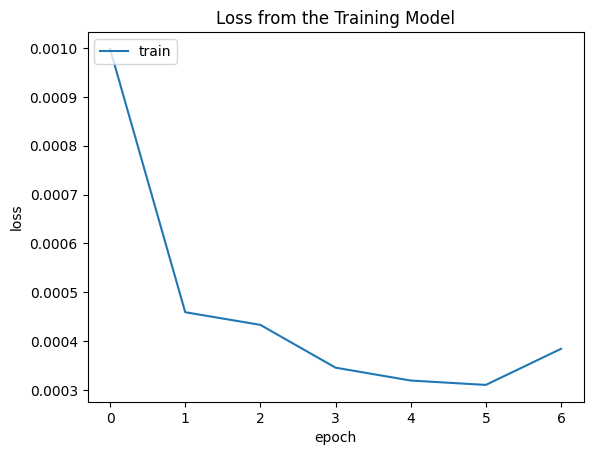

In [17]:
plt.plot(hist.history['loss'])
plt.title('Loss from the Training Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc = 'upper left')
plt.show()

In [29]:
test = df.iloc[:, 1:2]
y_test = test.iloc[60:, :].values

inputOpen = test.iloc[:, 0:].values
inputOpen_scaled = sca.transform(inputOpen)
inputOpen_scaled.shape

X_test = []
length = len(test)
timestep = 60
for i in range(timestep, length):
    X_test.append(inputOpen_scaled[i-timestep:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape

(10349, 60, 1)

In [30]:
y_pred = model.predict(X_test)
predicted = sca.inverse_transform(y_pred)

324/324 [==============================] - 7s 17ms/step


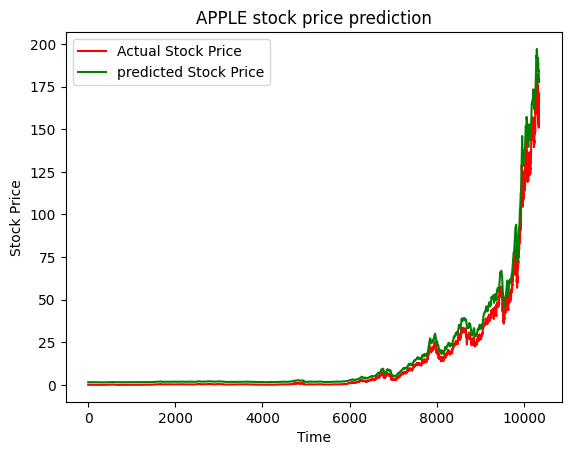

In [32]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted, color = 'green', label = 'predicted Stock Price')
plt.title('APPLE stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()